In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
import pickle
import networkx as nx
import ipywidgets
from ipywidgets import widgets

from run_simulation import invasion_main

# Running and Visualizing One Simulation

In [2]:
weeks_run = 15
run_mode = 'Baseline'
simulation_df = invasion_main(run_mode, weeks_run) # Change this to change the number of weeks
# print(type(simulation_df))
simulation_df

,County,Week 0,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14,Week 15
0,Cook,0.1,0.220077,0.326660,0.731304,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
1,DuPage,0.0,0.067797,0.434962,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
2,Kane,0.3,0.310927,0.359409,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
3,Will,0.0,0.021794,0.078116,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
4,Winnebago,0.0,0.076985,0.656201,0.814529,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Henderson,0.0,0.000000,0.001340,0.007531,0.000000,0.120905,0.198622,0.302225,0.511681,0.613783,1.000000,0.695920,0.935025,1.000000,1.0,1.0
98,Calhoun,0.0,0.031666,0.080383,0.195194,0.347078,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.361942,0.377417,0.794543,1.0,1.0
99,Schuyler,0.0,0.000152,0.000000,0.010686,0.019044,0.090402,0.222771,0.423262,0.793430,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
100,Gallatin,0.0,0.000012,0.000959,0.000854,0.002393,0.012779,0.033437,0.041683,0.382426,0.936031,1.000000,1.000000,1.000000,1.000000,1.0,1.0


In [3]:
def make_visual_df(simulation_df):
    visual_df = simulation_df.T
    visual_df.columns = visual_df.iloc[0]
    visual_df = visual_df.drop(visual_df.index[0])
    return visual_df

visual_df = make_visual_df(simulation_df)
visual_df

County,Cook,DuPage,Kane,Will,Winnebago,Lake,McHenry,St. Clair,Kendall,Madison,...,Scott,Stark,Jasper,Hamilton,Pike,Henderson,Calhoun,Schuyler,Gallatin,Pope
Week 0,0.1,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Week 1,0.220077,0.067797,0.310927,0.021794,0.076985,0.019282,0.044792,0.066878,0.08838,0.527404,...,0.0,0.002583,0.0,0.000181,0.0,0.0,0.031666,0.000152,0.000012,0.0
Week 2,0.32666,0.434962,0.359409,0.078116,0.656201,0.151227,0.322723,0.200151,0.254607,0.505908,...,0.012505,0.017776,0.003952,0.001463,0.012021,0.00134,0.080383,0.0,0.000959,0.0
Week 3,0.731304,1.0,1.0,1.0,0.814529,1.0,0.841789,0.181007,1.0,0.590785,...,0.046676,0.010089,0.049107,0.001427,0.030263,0.007531,0.195194,0.010686,0.000854,0.00001
Week 4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.238779,1.0,0.470805,...,0.066201,0.093248,0.058182,0.032951,0.060196,0.0,0.347078,0.019044,0.002393,0.000519
Week 5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.419163,1.0,0.806437,...,0.170368,0.245764,0.100967,0.094166,0.2786,0.120905,1.0,0.090402,0.012779,0.001968
Week 6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.769808,1.0,1.0,...,0.127544,1.0,0.464779,0.141713,0.285,0.198622,1.0,0.222771,0.033437,0.017954
Week 7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.117284,1.0,1.0,0.409007,0.043555,0.302225,1.0,0.423262,0.041683,0.051327
Week 8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.731385,1.0,1.0,0.835227,0.439834,0.511681,1.0,0.79343,0.382426,0.107058
Week 9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.822146,1.0,0.613783,1.0,1.0,0.936031,0.114801


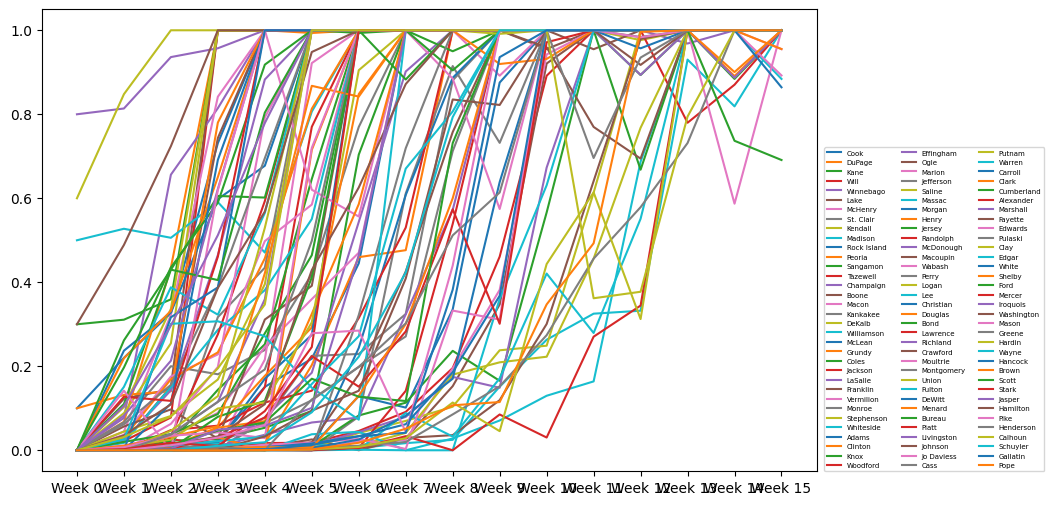

In [4]:
plt.figure(figsize=(10,6))
for county in visual_df.columns:
    plt.plot(visual_df.index, visual_df[county])
plt.legend(visual_df.columns, loc=(1.01, 0), fontsize=5, ncol=3)
plt.show()

In [5]:
path = 'data/location'
edges = pd.read_csv(f'{path}/county_edges.csv')

CG = pickle.load(open(f'{path}/IL_graph.dat', 'rb'))
handler = pickle.load(open(f'{path}/graph_handler_counties.dat', 'rb'))
highways = pickle.load(open(f'{path}/osmnx_highways.dat', 'rb'))

In [6]:
def make_network_heat(week):
    week = f'Week {week}'
#     min_value = simulation_df[week].min()
#     max_value = simulation_df[week].max()  # This makes the scale variable for each chart
    max_value = 1  # This keeps the scale constant 
    min_value = 0
    cmap = matplotlib.colormaps['YlOrRd']

    node_colors = {}
    for node in CG.nodes():
        value = simulation_df.loc[simulation_df['County'] == node.name, week].iloc[0]
        normalized_value = (value - min_value) / (max_value - min_value)
        node_colors[node.name] = cmap(normalized_value)
        
    labels = {node: handler[node.name].name for node in CG.nodes()}
    fig, ax = plt.subplots(figsize=(10, 15))
    node_positions = {node: [node.centroid.x, node.centroid.y] for node in CG.nodes()}
    nx.draw(CG, 
            pos=node_positions,
            ax=ax, 
            node_color=[node_colors.get(node.name, 'gray') for node in CG.nodes()],
            node_size=1500, )

    nx.draw_networkx_labels(CG, 
                            pos=node_positions, 
                            labels=labels,
                            font_size=6, 
                            ax=ax,
                           font_color='k')
    
    edge_colors = ['gray' if CG[src][tgt]['rel'] == 'interstate' else 'k' for src, tgt in CG.edges()]
    edge_widths = [5 if CG[src][tgt]['rel'] == 'interstate' else 1 for src, tgt in CG.edges()]
    nx.draw_networkx_edges(CG, pos=node_positions, edge_color=edge_colors, ax=ax, width=edge_widths)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_value, vmax=max_value))
    sm.set_array([])
    sub_ax = plt.axes([0.96, 0.55, 0.02, 0.3])
    plt.colorbar(sm, cax=sub_ax)
    plt.show()

In [7]:
widgets.interact(make_network_heat,
    week=widgets.IntSlider(min=0, max=len(simulation_df.columns)-2, step=1, layout=widgets.Layout(width='800px')),
)

interactive(children=(IntSlider(value=0, description='week', layout=Layout(width='800px'), max=15), Output()),…

<function __main__.make_network_heat(week)>

In [8]:
# This doesn't work very well for me since the page keeps re-centering

play = widgets.interact(make_network_heat, 
    week=widgets.Play( value=0,
                        min=0,
                        max=len(simulation_df.columns) - 2,
                        step=1,
                        interval=500,
                        disabled=False
                    ))

interactive(children=(Play(value=0, description='week', interval=500, max=15), Output()), _dom_classes=('widge…

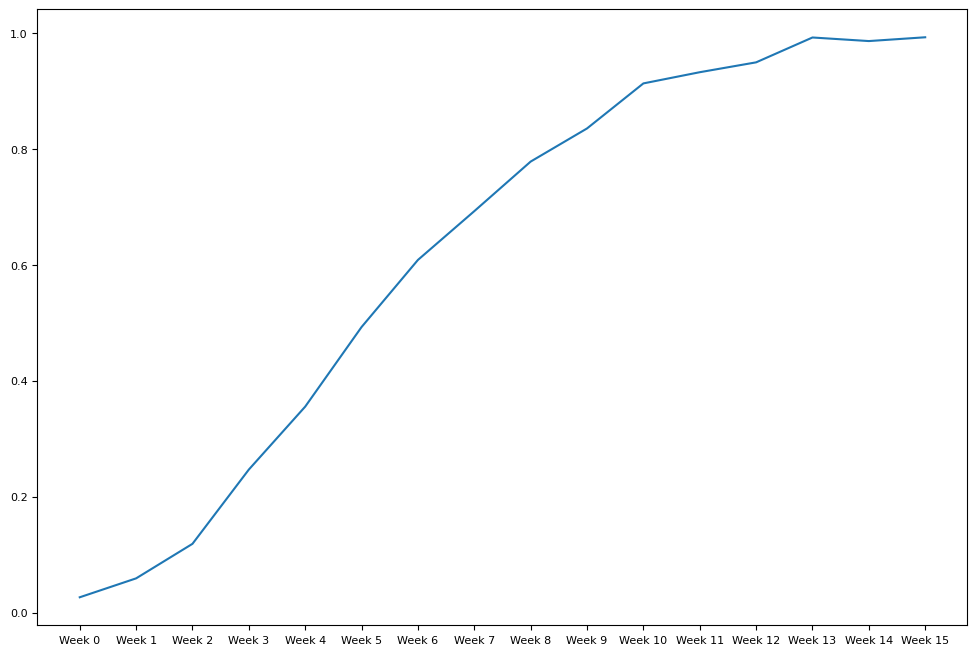

In [9]:
avg_df = visual_df.mean(axis=1)
plt.figure(figsize=(12,8))
plt.plot(avg_df.index, avg_df.iloc[0:, ])
plt.tick_params(labelsize=8)

# Repeating the Simulation and Plotting the Results

In [10]:
def make_average_graphs(df):
    vis_df = make_visual_df(df)
    avg_df = vis_df.mean(axis=1)
    plt.plot(avg_df.index, avg_df, linewidth=0.5)

In [11]:
def model_variables(run_mode, sims_run, sim_weeks):
    plt.figure(figsize=(12,8))
    plt.tick_params(labelsize=8)
    
    for i in range(0, sims_run):
        df = invasion_main(run_mode, sim_weeks)
        make_average_graphs(df)
    
    plt.show()

In [12]:
widgets.interact(model_variables,
    run_mode =['Baseline', 'Poison ToH', 'Population-Based Countermeasures', 'Quarantine'],
    sims_run = (10, 50, 10),
    sim_weeks = (1, 30, 1),
    value='Baseline',
    disabled=False,

)

interactive(children=(Dropdown(description='run_mode', options=('Baseline', 'Poison ToH', 'Population-Based Co…

<function __main__.model_variables(run_mode, sims_run, sim_weeks)>

# Model Variables

In [19]:
sims_run = 100  # RIP my RAM
sim_weeks = 40

all_trends = {}

def model_variables_avg(run_mode, sims_run, sim_weeks, all_trends):
    plt.figure(figsize=(12, 8))
    plt.tick_params(labelsize=8)
    all_avg_lines = []
    
    for i in range(sims_run):
        df = invasion_main(run_mode, sim_weeks)
        make_average_graphs(df)
        
        vis_df = make_visual_df(df)
        avg_df = vis_df.mean(axis=1)
        all_avg_lines.append(avg_df.values)
    
    if all_avg_lines:
        overall_avg = pd.DataFrame(all_avg_lines).mean()
        plt.plot(overall_avg.index, overall_avg, 'k-', linewidth=3)  # Plotting the overall trend line
    all_trends[run_mode] = overall_avg
    plt.show()
    return all_trends

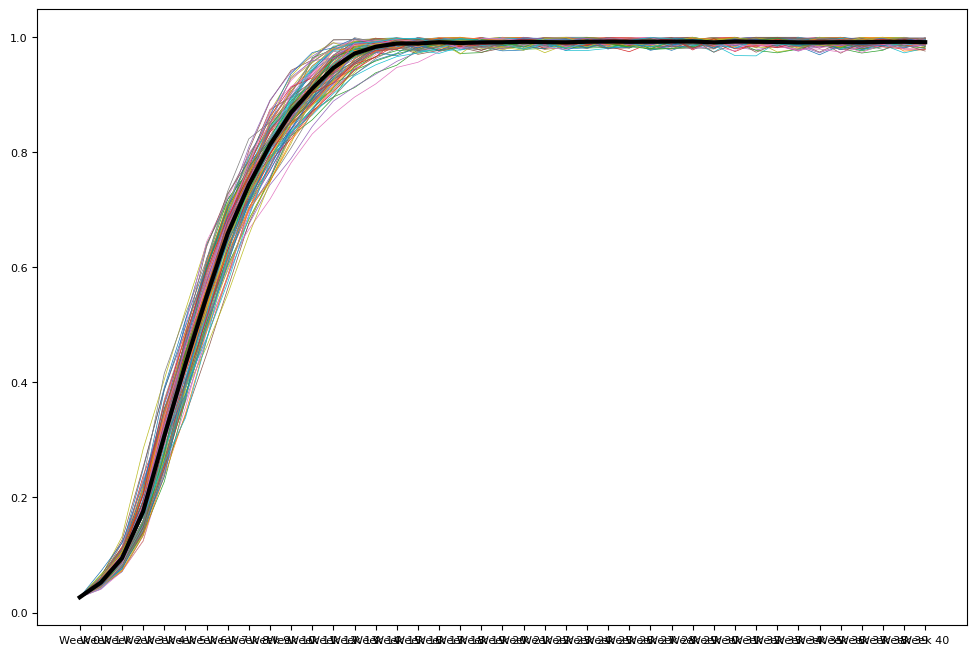

In [20]:
all_trends = model_variables_avg('Baseline', sims_run, sim_weeks, all_trends)

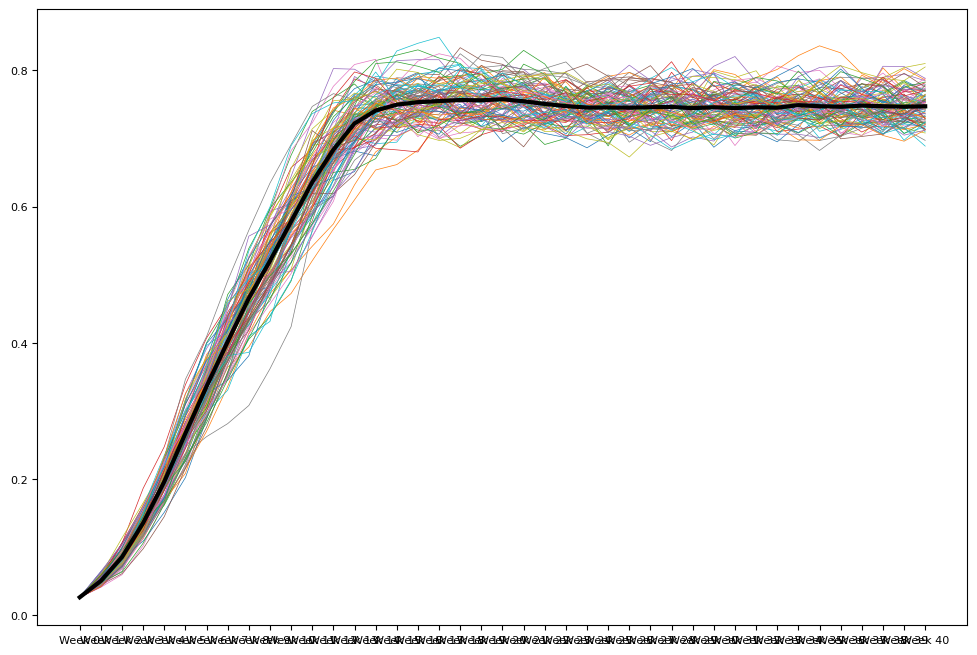

In [21]:
all_trends = model_variables_avg('Poison ToH', sims_run, sim_weeks, all_trends)

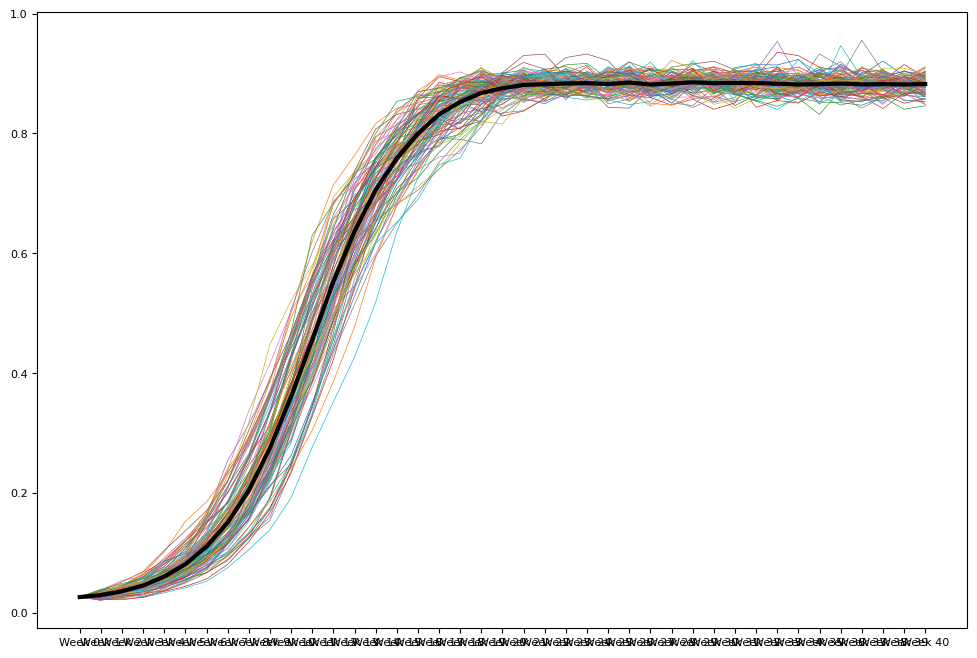

In [22]:
all_trends = model_variables_avg('Population-Based Countermeasures', sims_run, sim_weeks, all_trends)

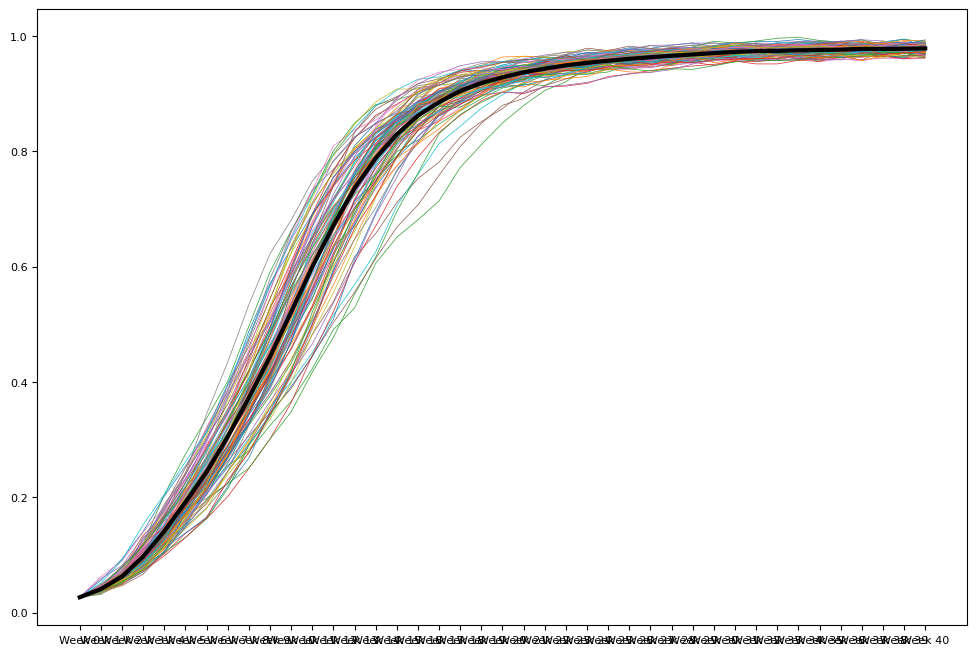

In [23]:
all_trends = model_variables_avg('Quarantine', sims_run, sim_weeks, all_trends)

# Show All Trend Lines

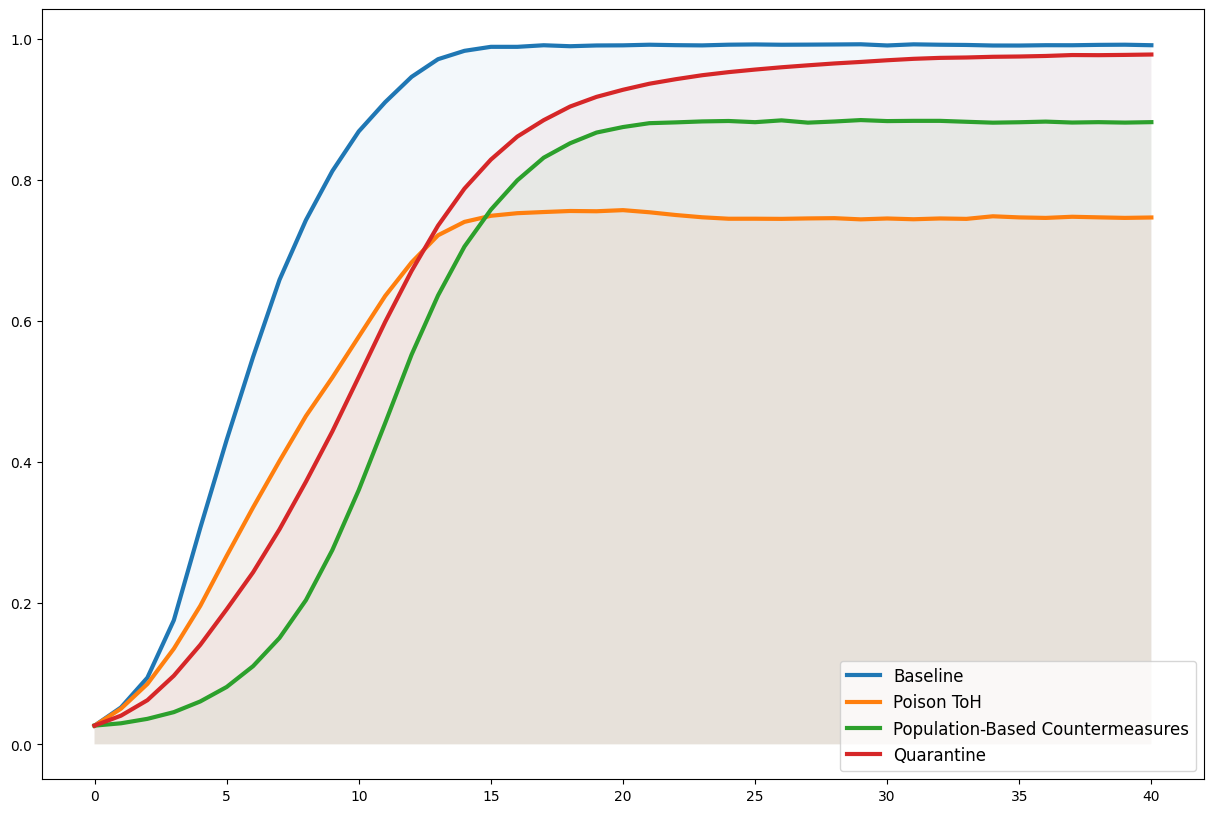

In [24]:
fig, ax = plt.subplots(figsize=(15, 10))

for model in all_trends:
    trend_sr = all_trends[model]
    X = trend_sr.index.tolist()
    Y = trend_sr.values.tolist()
    
    ax.plot(X, Y, label=model, linewidth=3)
    ax.fill_between(X, Y, 0, alpha=0.05, interpolate=True)

plt.legend(fontsize=12)
plt.show()